<a href="https://colab.research.google.com/github/mehdiansar/ACID/blob/master/T4_2_callbacks_LR_Hoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [22]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2024-05-31 19:03:23--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py.1’

dataset.py.1        100%[===================>]     917  --.-KB/s    in 0s      

2024-05-31 19:03:23 (37.7 MB/s) - ‘dataset.py.1’ saved [917/917]

mkdir: cannot create directory ‘dataset’: File exists
--2024-05-31 19:03:23--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deepl

In [23]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py

--2024-05-31 19:03:25--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py.1’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2024-05-31 19:03:25 (63.3 MB/s) - ‘learningratefinder.py.1’ saved [5439/5439]



In [24]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from learningratefinder import LearningRateFinder

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [27]:
MIN_LR = 1e-5

In [28]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [29]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


# 5. Define model architecture

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
opt = tf.keras.optimizers.SGD(learning_rate=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/19
110/110 [==============================] - 2s 6ms/step - loss: 2.3103 - accuracy: 0.0974
Epoch 2/19
110/110 [==============================] - 1s 6ms/step - loss: 2.3085 - accuracy: 0.0946
Epoch 3/19
110/110 [==============================] - 1s 6ms/step - loss: 2.3080 - accuracy: 0.0909
Epoch 4/19
110/110 [==============================] - 1s 5ms/step - loss: 2.3093 - accuracy: 0.1037
Epoch 5/19
110/110 [==============================] - 1s 5ms/step - loss: 2.3085 - accuracy: 0.0951
Epoch 6/19
110/110 [==============================] - 1s 6ms/step - loss: 2.3096 - accuracy: 0.0889
Epoch 7/19
110/110 [==============================] - 1s 6ms/step - loss: 2.3084 - accuracy: 0.1080
Epoch 8/19
110/110 [==============================] - 1s 6ms/step - loss: 2.3097 - accuracy: 0.0986
Epoch 9/19
110/110 [==============================] - 1s 5ms/step - loss: 2.3108 - accuracy: 0.0917
Epoch 10/19
110/110 [==============================] - 1s 5ms/step - loss: 2.3053 - accuracy: 0.1011

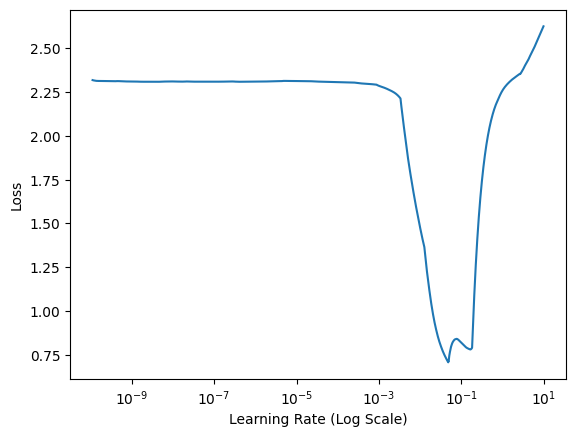

In [30]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((X_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()